1.Identify types (categorical: crop, region; continuous: yield, rainfall).

In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("/content/crop_yield.csv")

# Identify categorical and continuous variables
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns.tolist()
continuous_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical Variables:", categorical_cols)
print("Continuous Variables:", continuous_cols)


Categorical Variables: ['Region', 'Soil_Type', 'Crop', 'Fertilizer_Used', 'Irrigation_Used', 'Weather_Condition']
Continuous Variables: ['Rainfall_mm', 'Temperature_Celsius', 'Days_to_Harvest', 'Yield_tons_per_hectare']


/tmp/ipython-input-2661583130.py:4: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/crop_yield.csv")


2.Apply bivariate plots for rainfall vs yield.

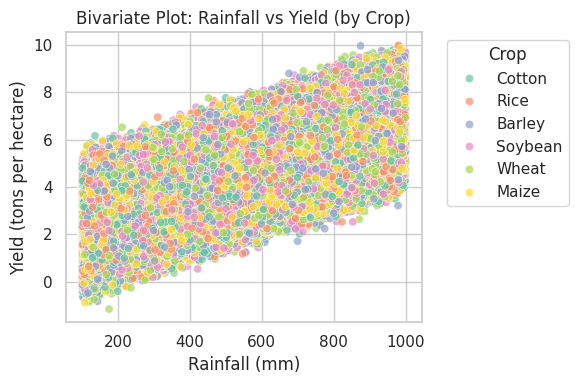

<Figure size 600x400 with 0 Axes>

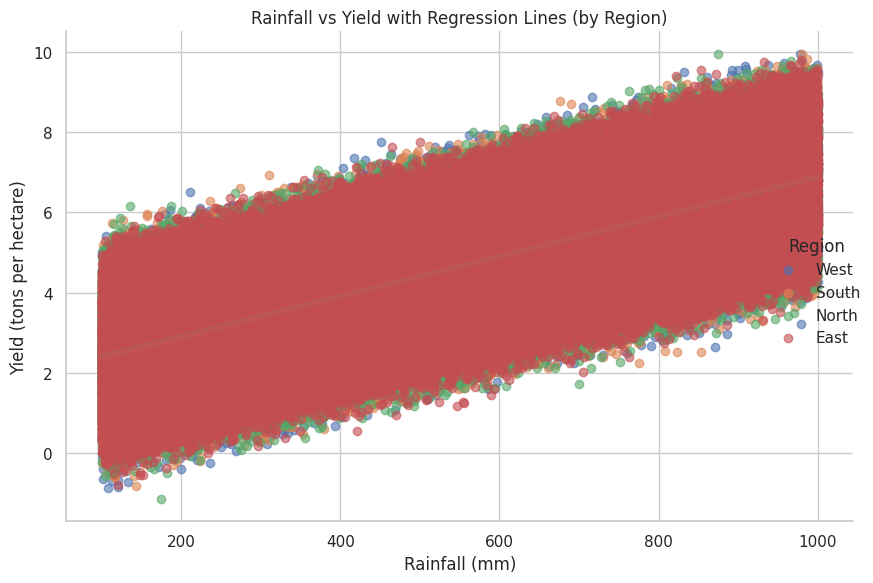

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("/content/crop_yield.csv")

# Set plot style
sns.set(style="whitegrid")

# ===== 1️⃣ Scatter Plot: Rainfall vs Yield =====
plt.figure(figsize=(6,4))
sns.scatterplot(
    data=df,
    x="Rainfall_mm",
    y="Yield_tons_per_hectare",
    hue="Crop",         # color by crop
    palette="Set2",
    alpha=0.7
)
plt.title("Bivariate Plot: Rainfall vs Yield (by Crop)")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Yield (tons per hectare)")
plt.legend(title="Crop", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

# ===== 2️⃣ Regression Plot (Optional) =====
plt.figure(figsize=(6,4))
sns.lmplot(
    data=df,
    x="Rainfall_mm",
    y="Yield_tons_per_hectare",
    hue="Region",        # separate by region
    height=6,
    aspect=1.3,
    scatter_kws={'alpha':0.6}
)
plt.title("Rainfall vs Yield with Regression Lines (by Region)")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Yield (tons per hectare)")
plt.tight_layout()
plt.show()


3. Create crop relationship graphs based on similar yield patterns.

/tmp/ipython-input-3848877681.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=crop_yield_avg, x="Crop", y="Yield_tons_per_hectare", palette="viridis")


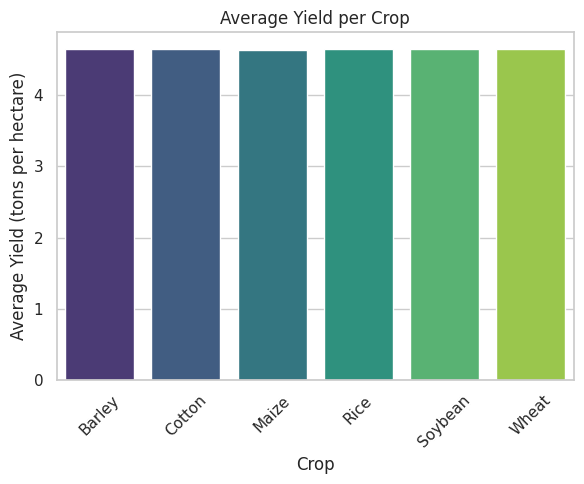

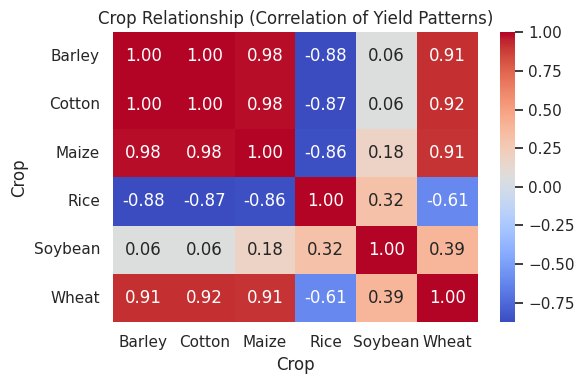

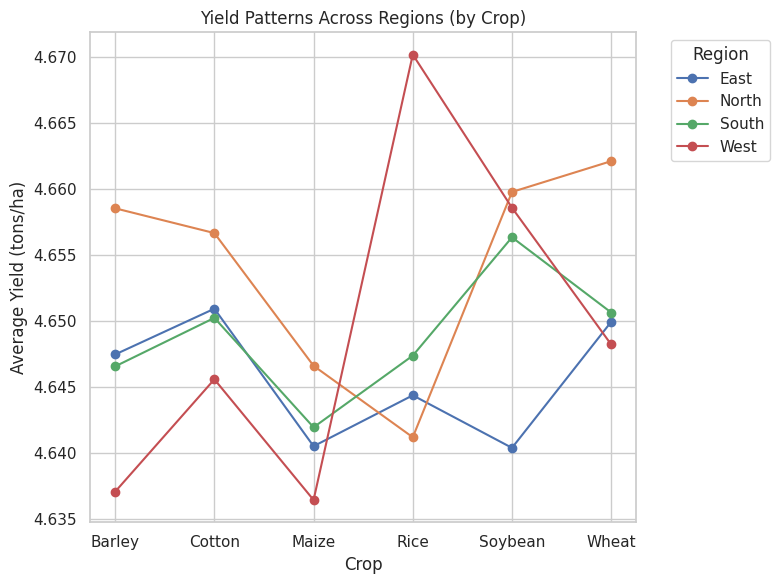

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("/content/crop_yield.csv")

# ===== 1️⃣ Compute average yield per crop =====
crop_yield_avg = df.groupby("Crop")["Yield_tons_per_hectare"].mean().reset_index()

# Bar plot – average yield by crop
plt.figure(figsize=(6,5))
sns.barplot(data=crop_yield_avg, x="Crop", y="Yield_tons_per_hectare", palette="viridis")
plt.title("Average Yield per Crop")
plt.xlabel("Crop")
plt.ylabel("Average Yield (tons per hectare)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ===== 2️⃣ Pairwise correlation between crops (based on regions) =====
# Create pivot: rows = Region, columns = Crop, values = average yield
pivot_table = df.pivot_table(index="Region", columns="Crop", values="Yield_tons_per_hectare", aggfunc="mean")

# Compute correlation matrix between crops
corr = pivot_table.corr()

# ===== 3️⃣ Heatmap – correlation between crops =====
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Crop Relationship (Correlation of Yield Patterns)")
plt.tight_layout()
plt.show()

# ===== 4️⃣ Line Plot – compare yield patterns across regions =====
pivot_table.T.plot(figsize=(8,6), marker="o")
plt.title("Yield Patterns Across Regions (by Crop)")
plt.xlabel("Crop")
plt.ylabel("Average Yield (tons/ha)")
plt.legend(title="Region", bbox_to_anchor=(1.05,1), loc="upper left")
plt.tight_layout()
plt.show()


4. Geospatial map for yield visualization across regions

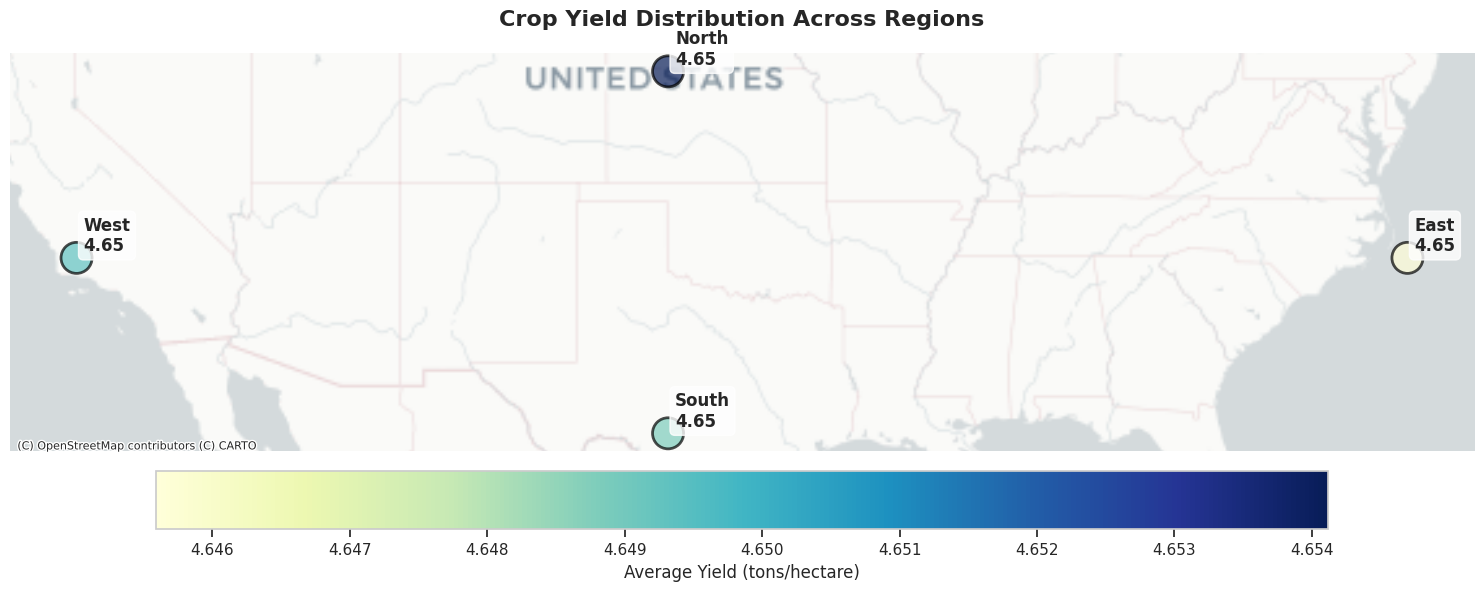


Creating detailed map with individual data points...


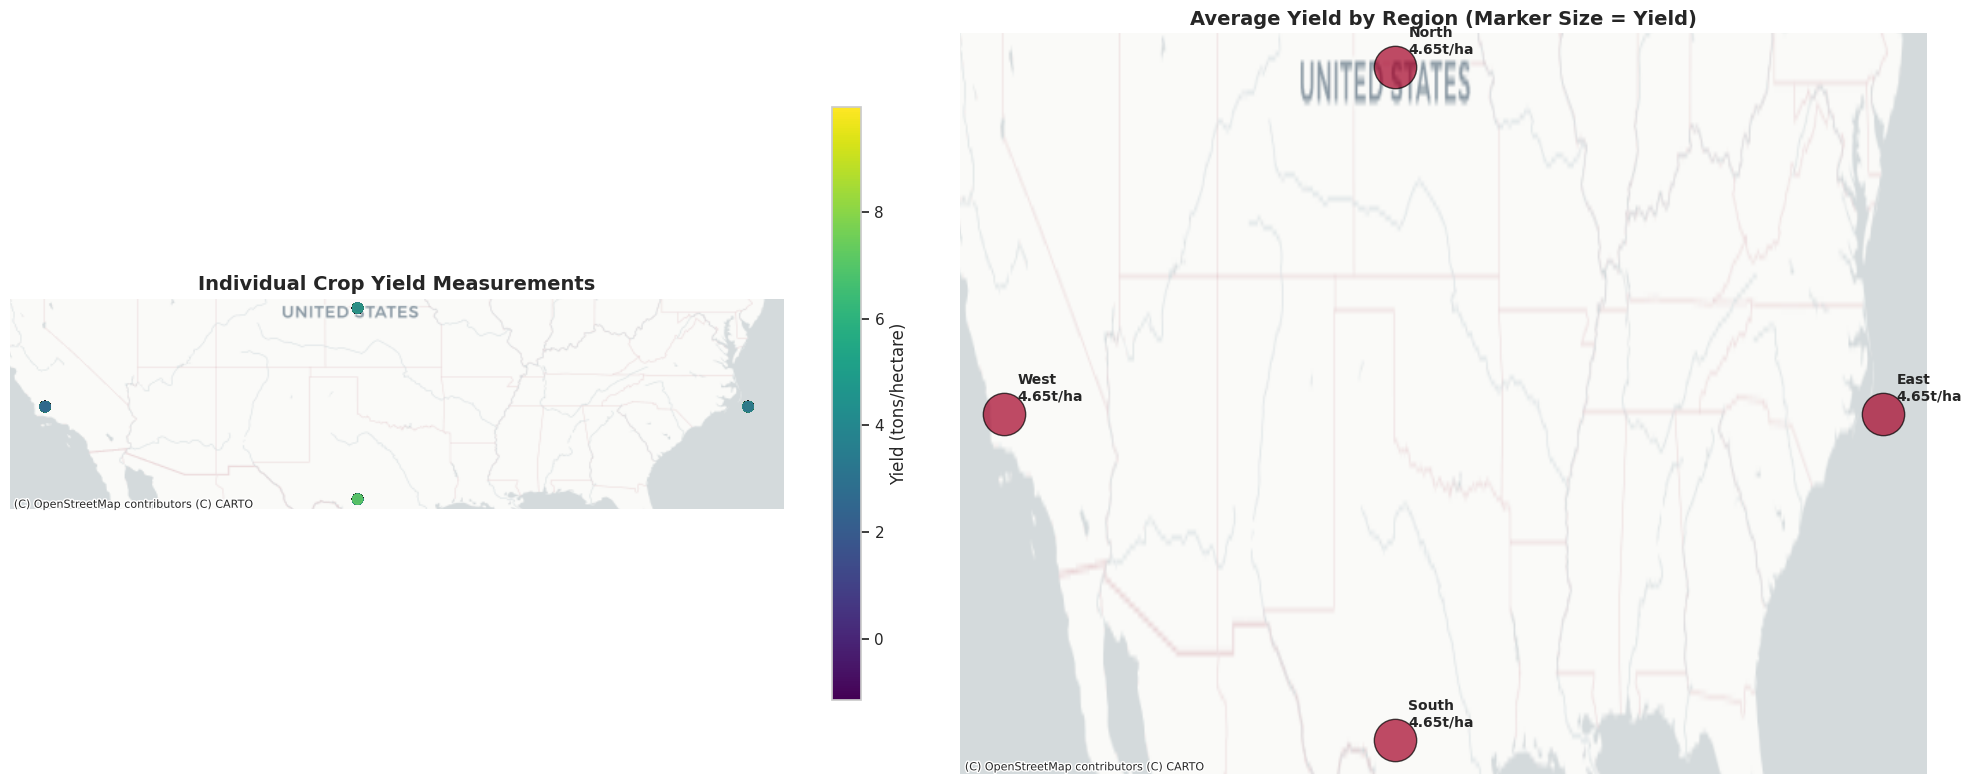


YIELD SUMMARY BY REGION
West: 4.65 ± 1.70 tons/hectare (n=250074)
South: 4.65 ± 1.70 tons/hectare (n=250054)
North: 4.65 ± 1.70 tons/hectare (n=250173)
East: 4.65 ± 1.70 tons/hectare (n=249699)

Best performing region: North with 4.65 tons/hectare


In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import Point
import numpy as np

# Load the data
df = pd.read_csv('/content/crop_yield.csv')

# Create a simple region to coordinates mapping (you may want to use more precise coordinates)
region_coords = {
    'North': (40.0, -100.0),
    'South': (30.0, -100.0),
    'East': (35.0, -75.0),
    'West': (35.0, -120.0)
}

# Add coordinates to the dataframe
df['latitude'] = df['Region'].map({k: v[0] for k, v in region_coords.items()})
df['longitude'] = df['Region'].map({k: v[1] for k, v in region_coords.items()})

# Calculate average yield by region
region_yield = df.groupby('Region')['Yield_tons_per_hectare'].mean().reset_index()

# Add coordinates to region summary
region_yield['latitude'] = region_yield['Region'].map({k: v[0] for k, v in region_coords.items()})
region_yield['longitude'] = region_yield['Region'].map({k: v[1] for k, v in region_coords.items()})

# Create GeoDataFrame
geometry = [Point(xy) for xy in zip(region_yield['longitude'], region_yield['latitude'])]
gdf = gpd.GeoDataFrame(region_yield, geometry=geometry, crs="EPSG:4326")

# Convert to Web Mercator for basemap
gdf = gdf.to_crs(epsg=3857)

# Create the plot
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Plot regions with color based on yield
scatter = gdf.plot(ax=ax,
                  column='Yield_tons_per_hectare',
                  cmap='YlGnBu',
                  markersize=500,
                  alpha=0.7,
                  edgecolor='black',
                  linewidth=2,
                  legend=True,
                  legend_kwds={'label': 'Average Yield (tons/hectare)',
                              'orientation': 'horizontal',
                              'shrink': 0.8,
                              'pad': 0.02})

# Add region labels
for idx, row in gdf.iterrows():
    ax.annotate(f"{row['Region']}\n{row['Yield_tons_per_hectare']:.2f}",
               (row.geometry.x, row.geometry.y),
               xytext=(5, 5),
               textcoords="offset points",
               fontsize=12,
               fontweight='bold',
               bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8))

# Add basemap
ctx.add_basemap(ax, crs=gdf.crs, source=ctx.providers.CartoDB.Positron)

# Customize the plot
ax.set_title('Crop Yield Distribution Across Regions', fontsize=16, fontweight='bold', pad=20)
ax.set_axis_off()

plt.tight_layout()
plt.show()

# Additional visualization: Create a more detailed map with individual data points
print("\nCreating detailed map with individual data points...")

# Create geometry for all individual data points
geometry_all = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf_all = gpd.GeoDataFrame(df, geometry=geometry_all, crs="EPSG:4326")
gdf_all = gdf_all.to_crs(epsg=3857)

# Create a more detailed visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plot 1: Individual points colored by yield
scatter1 = gdf_all.plot(ax=ax1,
                       column='Yield_tons_per_hectare',
                       cmap='viridis',
                       markersize=50,
                       alpha=0.6,
                       legend=True,
                       legend_kwds={'label': 'Yield (tons/hectare)',
                                   'orientation': 'vertical',
                                   'shrink': 0.8})

ctx.add_basemap(ax1, crs=gdf_all.crs, source=ctx.providers.CartoDB.Positron)
ax1.set_title('Individual Crop Yield Measurements', fontsize=14, fontweight='bold')
ax1.set_axis_off()

# Plot 2: Average yield by region with crop type information
for region in df['Region'].unique():
    region_data = df[df['Region'] == region]
    avg_yield = region_data['Yield_tons_per_hectare'].mean()

    # Get coordinates for this region
    lat = region_coords[region][0]
    lon = region_coords[region][1]

    # Convert to Web Mercator for plotting
    point = gpd.GeoSeries([Point(lon, lat)], crs="EPSG:4326").to_crs(epsg=3857)

    # Plot the point with size based on average yield
    ax2.scatter(point.x, point.y,
               s=avg_yield*200,  # Scale marker size by yield
               c=[avg_yield],
               cmap='RdYlGn',
               alpha=0.7,
               edgecolor='black')

    # Add region label
    ax2.annotate(f"{region}\n{avg_yield:.2f}t/ha",
                (point.x.iloc[0], point.y.iloc[0]),
                xytext=(10, 10),
                textcoords="offset points",
                fontsize=10,
                fontweight='bold')

ctx.add_basemap(ax2, crs=gdf_all.crs, source=ctx.providers.CartoDB.Positron)
ax2.set_title('Average Yield by Region (Marker Size = Yield)', fontsize=14, fontweight='bold')
ax2.set_axis_off()

plt.tight_layout()
plt.show()

# Print summary statistics
print("\n" + "="*50)
print("YIELD SUMMARY BY REGION")
print("="*50)
for region in df['Region'].unique():
    region_data = df[df['Region'] == region]
    avg_yield = region_data['Yield_tons_per_hectare'].mean()
    std_yield = region_data['Yield_tons_per_hectare'].std()
    count = len(region_data)

    print(f"{region}: {avg_yield:.2f} ± {std_yield:.2f} tons/hectare (n={count})")

# Best performing region
best_region = region_yield.loc[region_yield['Yield_tons_per_hectare'].idxmax()]
print(f"\nBest performing region: {best_region['Region']} with {best_region['Yield_tons_per_hectare']:.2f} tons/hectare")

In [ ]:
%pip install contextily

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 86.3 MB/s eta 0:00:00


5.Build a dashboard integrating all visuals using Tableau.

In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("/content/crop_yield.csv")

# ===== 1️⃣ Clean and prepare data =====
df = df.dropna(subset=['Yield_tons_per_hectare', 'Rainfall_mm'])
df['Yield_tons_per_hectare'] = df['Yield_tons_per_hectare'].astype(float)
df['Rainfall_mm'] = df['Rainfall_mm'].astype(float)

# ===== 2️⃣ Compute summary tables =====

# (a) Average yield by Crop and Region
avg_yield = df.groupby(['Crop', 'Region'])['Yield_tons_per_hectare'].mean().reset_index()
avg_yield.to_csv("avg_yield_by_crop_region.csv", index=False)

# (b) Rainfall vs Yield (for scatter plot)
rainfall_yield = df[['Crop', 'Region', 'Rainfall_mm', 'Yield_tons_per_hectare']]
rainfall_yield.to_csv("rainfall_vs_yield.csv", index=False)

# (c) Crop correlation matrix (for heatmap)
pivot = df.pivot_table(index='Region', columns='Crop', values='Yield_tons_per_hectare', aggfunc='mean')
corr = pivot.corr()
corr.to_csv("crop_correlation.csv")

# (d) Average yield by Region (for map)
region_yield = df.groupby('Region')['Yield_tons_per_hectare'].mean().reset_index()
region_yield.to_csv("region_yield.csv", index=False)

print("✅ All Tableau CSVs created successfully:")
print("- avg_yield_by_crop_region.csv")
print("- rainfall_vs_yield.csv")
print("- crop_correlation.csv")
print("- region_yield.csv")


✅ All Tableau CSVs created successfully:
- avg_yield_by_crop_region.csv
- rainfall_vs_yield.csv
- crop_correlation.csv
- region_yield.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import json

# Load the data
df = pd.read_csv('/content/crop_yield.csv')

print("Dataset Overview:")
print(f"Total records: {len(df)}")
print(f"Columns: {list(df.columns)}")
print("\nFirst few rows:")
print(df.head())

# Data preprocessing and feature engineering
print("\nPreprocessing data for Tableau dashboard...")

# Create yield categories for easier visualization
def categorize_yield(yield_value):
    if yield_value < 2:
        return 'Very Low'
    elif yield_value < 4:
        return 'Low'
    elif yield_value < 6:
        return 'Medium'
    elif yield_value < 8:
        return 'High'
    else:
        return 'Very High'

df['Yield_Category'] = df['Yield_tons_per_hectare'].apply(categorize_yield)

# Create season categories based on temperature
def categorize_season(temp):
    if temp < 20:
        return 'Cool'
    elif temp < 25:
        return 'Moderate'
    elif temp < 30:
        return 'Warm'
    else:
        return 'Hot'

df['Season_Category'] = df['Temperature_Celsius'].apply(categorize_season)

# Create rainfall categories
def categorize_rainfall(rainfall):
    if rainfall < 300:
        return 'Low Rainfall'
    elif rainfall < 600:
        return 'Moderate Rainfall'
    elif rainfall < 900:
        return 'High Rainfall'
    else:
        return 'Very High Rainfall'

df['Rainfall_Category'] = df['Rainfall_mm'].apply(categorize_rainfall)

# Calculate profit potential (simplified metric)
df['Profit_Potential'] = df['Yield_tons_per_hectare'] * 1000  # Assuming $1000/ton

# Create success score based on multiple factors
df['Success_Score'] = (
    df['Yield_tons_per_hectare'] / df['Yield_tons_per_hectare'].max() * 40 +
    (df['Fertilizer_Used'].astype(int) * 10) +
    (df['Irrigation_Used'].astype(int) * 10) +
    (df['Rainfall_mm'] / df['Rainfall_mm'].max() * 20) +
    (1 - (df['Days_to_Harvest'] / df['Days_to_Harvest'].max())) * 20
)

# Create summary tables for Tableau
print("\nCreating summary tables...")

# 1. Regional Summary
regional_summary = df.groupby('Region').agg({
    'Yield_tons_per_hectare': ['mean', 'std', 'min', 'max', 'count'],
    'Rainfall_mm': 'mean',
    'Temperature_Celsius': 'mean',
    'Days_to_Harvest': 'mean',
    'Fertilizer_Used': 'mean',
    'Irrigation_Used': 'mean',
    'Profit_Potential': 'sum'
}).round(2)

regional_summary.columns = ['_'.join(col).strip() for col in regional_summary.columns.values]
regional_summary = regional_summary.reset_index()

# 2. Crop Performance Summary
crop_summary = df.groupby('Crop').agg({
    'Yield_tons_per_hectare': ['mean', 'std', 'min', 'max'],
    'Rainfall_mm': 'mean',
    'Temperature_Celsius': 'mean',
    'Days_to_Harvest': 'mean',
    'Profit_Potential': 'sum'
}).round(2)

crop_summary.columns = ['_'.join(col).strip() for col in crop_summary.columns.values]
crop_summary = crop_summary.reset_index()

# 3. Soil Type Analysis
soil_summary = df.groupby('Soil_Type').agg({
    'Yield_tons_per_hectare': ['mean', 'std', 'count'],
    'Rainfall_mm': 'mean',
    'Temperature_Celsius': 'mean'
}).round(2)

soil_summary.columns = ['_'.join(col).strip() for col in soil_summary.columns.values]
soil_summary = soil_summary.reset_index()

# 4. Weather Condition Impact
weather_summary = df.groupby('Weather_Condition').agg({
    'Yield_tons_per_hectare': ['mean', 'std', 'count'],
    'Rainfall_mm': 'mean'
}).round(2)

weather_summary.columns = ['_'.join(col).strip() for col in weather_summary.columns.values]
weather_summary = weather_summary.reset_index()

# 5. Best Practices Analysis
best_practices = df.groupby(['Fertilizer_Used', 'Irrigation_Used']).agg({
    'Yield_tons_per_hectare': ['mean', 'count']
}).round(2).reset_index()

# Flatten the multi-level column index created by agg
best_practices.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in best_practices.columns.values]


# Create correlation matrix for relationships
numeric_columns = ['Yield_tons_per_hectare', 'Rainfall_mm', 'Temperature_Celsius', 'Days_to_Harvest']
correlation_matrix = df[numeric_columns].corr().round(3)

# Export data for Tableau
print("\nExporting data for Tableau...")

# Main dataset
df.to_csv('crop_yield_tableau_main.csv', index=False)

# Summary tables
regional_summary.to_csv('crop_yield_regional_summary.csv', index=False)
crop_summary.to_csv('crop_yield_crop_summary.csv', index=False)
soil_summary.to_csv('crop_yield_soil_summary.csv', index=False)
weather_summary.to_csv('crop_yield_weather_summary.csv', index=False)
best_practices.to_csv('crop_yield_best_practices.csv', index=False)

# Correlation matrix
correlation_matrix.to_csv('crop_yield_correlation_matrix.csv')

# Create a metadata file for Tableau
metadata = {
    "dataset_description": "Crop Yield Analysis Dataset for Tableau Dashboard",
    "total_records": len(df),
    "columns_description": {
        "Region": "Geographical region (North, South, East, West)",
        "Soil_Type": "Type of soil (Clay, Loam, Sandy, Silt, Peaty, Chalky)",
        "Crop": "Type of crop grown",
        "Rainfall_mm": "Rainfall in millimeters",
        "Temperature_Celsius": "Average temperature in Celsius",
        "Fertilizer_Used": "Boolean indicating fertilizer usage",
        "Irrigation_Used": "Boolean indicating irrigation usage",
        "Weather_Condition": "Weather condition during growth",
        "Days_to_Harvest": "Number of days until harvest",
        "Yield_tons_per_hectare": "Crop yield in tons per hectare",
        "Yield_Category": "Categorized yield levels",
        "Season_Category": "Temperature-based season categories",
        "Rainfall_Category": "Categorized rainfall levels",
        "Profit_Potential": "Estimated profit potential",
        "Success_Score": "Composite success score"
    },
    "export_timestamp": datetime.now().strftime("%Y-%m-%d %H:%M:%S")
}

with open('tableau_metadata.json', 'w') as f:
    json.dump(metadata, f, indent=2)

# Generate Python visualizations for reference
print("\nGenerating reference visualizations...")

# 1. Yield Distribution by Region
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Region', y='Yield_tons_per_hectare')
plt.title('Yield Distribution by Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('yield_by_region.png', dpi=300, bbox_inches='tight')
plt.close()

# 2. Crop Performance
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Crop', y='Yield_tons_per_hectare', estimator='mean')
plt.title('Average Yield by Crop Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('yield_by_crop.png', dpi=300, bbox_inches='tight')
plt.close()

# 3. Soil Type Impact
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Soil_Type', y='Yield_tons_per_hectare')
plt.title('Yield by Soil Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('yield_by_soil.png', dpi=300, bbox_inches='tight')
plt.close()

# 4. Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.close()

# 5. Best Practices Impact
plt.figure(figsize=(10, 6))
practice_data = df.groupby(['Fertilizer_Used', 'Irrigation_Used'])['Yield_tons_per_hectare'].mean().reset_index()
practice_data['Practice'] = practice_data['Fertilizer_Used'].astype(str) + '_' + practice_data['Irrigation_Used'].astype(str)
sns.barplot(data=practice_data, x='Practice', y='Yield_tons_per_hectare')
plt.title('Yield by Agricultural Practices\n(True=True, False=False)')
plt.tight_layout()
plt.savefig('best_practices_impact.png', dpi=300, bbox_inches='tight')
plt.close()

# Create Tableau dashboard specification document
dashboard_spec = """
TABLEAU DASHBOARD SPECIFICATION
==============================

Dataset Files:
1. crop_yield_tableau_main.csv - Main dataset with all records
2. crop_yield_regional_summary.csv - Regional performance summary
3. crop_yield_crop_summary.csv - Crop type analysis
4. crop_yield_soil_summary.csv - Soil type impact
5. crop_yield_weather_summary.csv - Weather condition analysis
6. crop_yield_best_practices.csv - Agricultural practices impact
7. crop_yield_correlation_matrix.csv - Feature relationships

Recommended Dashboard Layout:

1. EXECUTIVE SUMMARY VIEW
   - Key Performance Indicators (KPIs)
   - Regional yield comparison
   - Best performing crops
   - Overall success metrics

2. REGIONAL ANALYSIS VIEW
   - Yield distribution by region
   - Regional performance metrics
   - Map visualization (if coordinates available)
   - Regional best practices

3. CROP PERFORMANCE VIEW
   - Yield by crop type
   - Optimal conditions for each crop
   - Crop-specific recommendations
   - Profitability analysis

4. ENVIRONMENTAL FACTORS VIEW
   - Rainfall impact analysis
   - Temperature effects
   - Soil type performance
   - Weather condition impact

5. BEST PRACTICES VIEW
   - Fertilizer impact analysis
   - Irrigation benefits
   - Combined practices effect
   - Recommendations matrix

6. PREDICTIVE INSIGHTS VIEW
   - Success score distribution
   - High-potential combinations
   - Risk factors analysis
   - Optimization opportunities

Interactive Features:
- Region filter
- Crop type selector
- Soil type filter
- Yield range slider
- Practice combination toggles

Color Scheme:
- Green gradient for yield values
- Blue for rainfall
- Red/Orange for temperature
- Purple for success scores
"""

with open('tableau_dashboard_specification.txt', 'w') as f:
    f.write(dashboard_spec)

print("\n" + "="*60)
print("TABLEAU DASHBOARD DATA EXPORT COMPLETE")
print("="*60)
print(f"✓ Main dataset: {len(df)} records exported")
print("✓ 6 summary tables created")
print("✓ 5 reference visualizations generated")
print("✓ Metadata and specification documents created")
print("\nFiles created:")
print("""1. crop_yield_tableau_main.csv
2. crop_yield_regional_summary.csv
3. crop_yield_crop_summary.csv
4. crop_yield_soil_summary.csv
5. crop_yield_weather_summary.csv
6. crop_yield_best_practices.csv
7. crop_yield_correlation_matrix.csv
8. tableau_metadata.json
9. tableau_dashboard_specification.txt
10. 5 reference PNG visualization files""")

print("\nNext Steps:")
print("""1. Open Tableau and connect to the CSV files
2. Use 'crop_yield_tableau_main.csv' as your primary data source
3. Create relationships with summary tables as needed
4. Follow the dashboard specification for layout
5. Implement the recommended interactive features""")

Dataset Overview:
Total records: 1000000
Columns: ['Region', 'Soil_Type', 'Crop', 'Rainfall_mm', 'Temperature_Celsius', 'Fertilizer_Used', 'Irrigation_Used', 'Weather_Condition', 'Days_to_Harvest', 'Yield_tons_per_hectare']

First few rows:
  Region Soil_Type     Crop  Rainfall_mm  Temperature_Celsius  \
0   West     Sandy   Cotton   897.077239            27.676966   
1  South      Clay     Rice   992.673282            18.026142   
2  North      Loam   Barley   147.998025            29.794042   
3  North     Sandy  Soybean   986.866331            16.644190   
4  South      Silt    Wheat   730.379174            31.620687   

   Fertilizer_Used  Irrigation_Used Weather_Condition  Days_to_Harvest  \
0            False             True            Cloudy              122   
1             True             True             Rainy              140   
2            False            False             Sunny              106   
3            False             True             Rainy              146  